In [1]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_id = '1kIXpkpjEmonYCn_VNw7a-2p1CflaAuoa'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(url, 'data.csv', quiet=False)

d_listing = pd.read_csv('data.csv')
d_listing.head(1)

Downloading...
From: https://drive.google.com/uc?export=download&id=1kIXpkpjEmonYCn_VNw7a-2p1CflaAuoa
To: /content/data.csv
100%|██████████| 16.9M/16.9M [00:00<00:00, 53.9MB/s]


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [3]:
file_id = '1X9a59SPipMZopcy2XJ7zvbfZNnjDnhtV'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(url, 'data.csv', quiet=False)

d_calender = pd.read_csv('data.csv')
d_calender.head()

Downloading...
From: https://drive.google.com/uc?export=download&id=1X9a59SPipMZopcy2XJ7zvbfZNnjDnhtV
To: /content/data.csv
100%|██████████| 36.7M/36.7M [00:00<00:00, 57.4MB/s]


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
d_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
d_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
# Misalnya df adalah dataframe kamu
missing_values = d_listing.isnull().sum()
print("Missing values per kolom:")
missing_values.sort_values(ascending=False).head(20)

Missing values per kolom:


,0
license,3818
square_feet,3721
monthly_price,2301
security_deposit,1952
weekly_price,1809
notes,1606
neighborhood_overview,1032
cleaning_fee,1030
transit,934
host_about,859


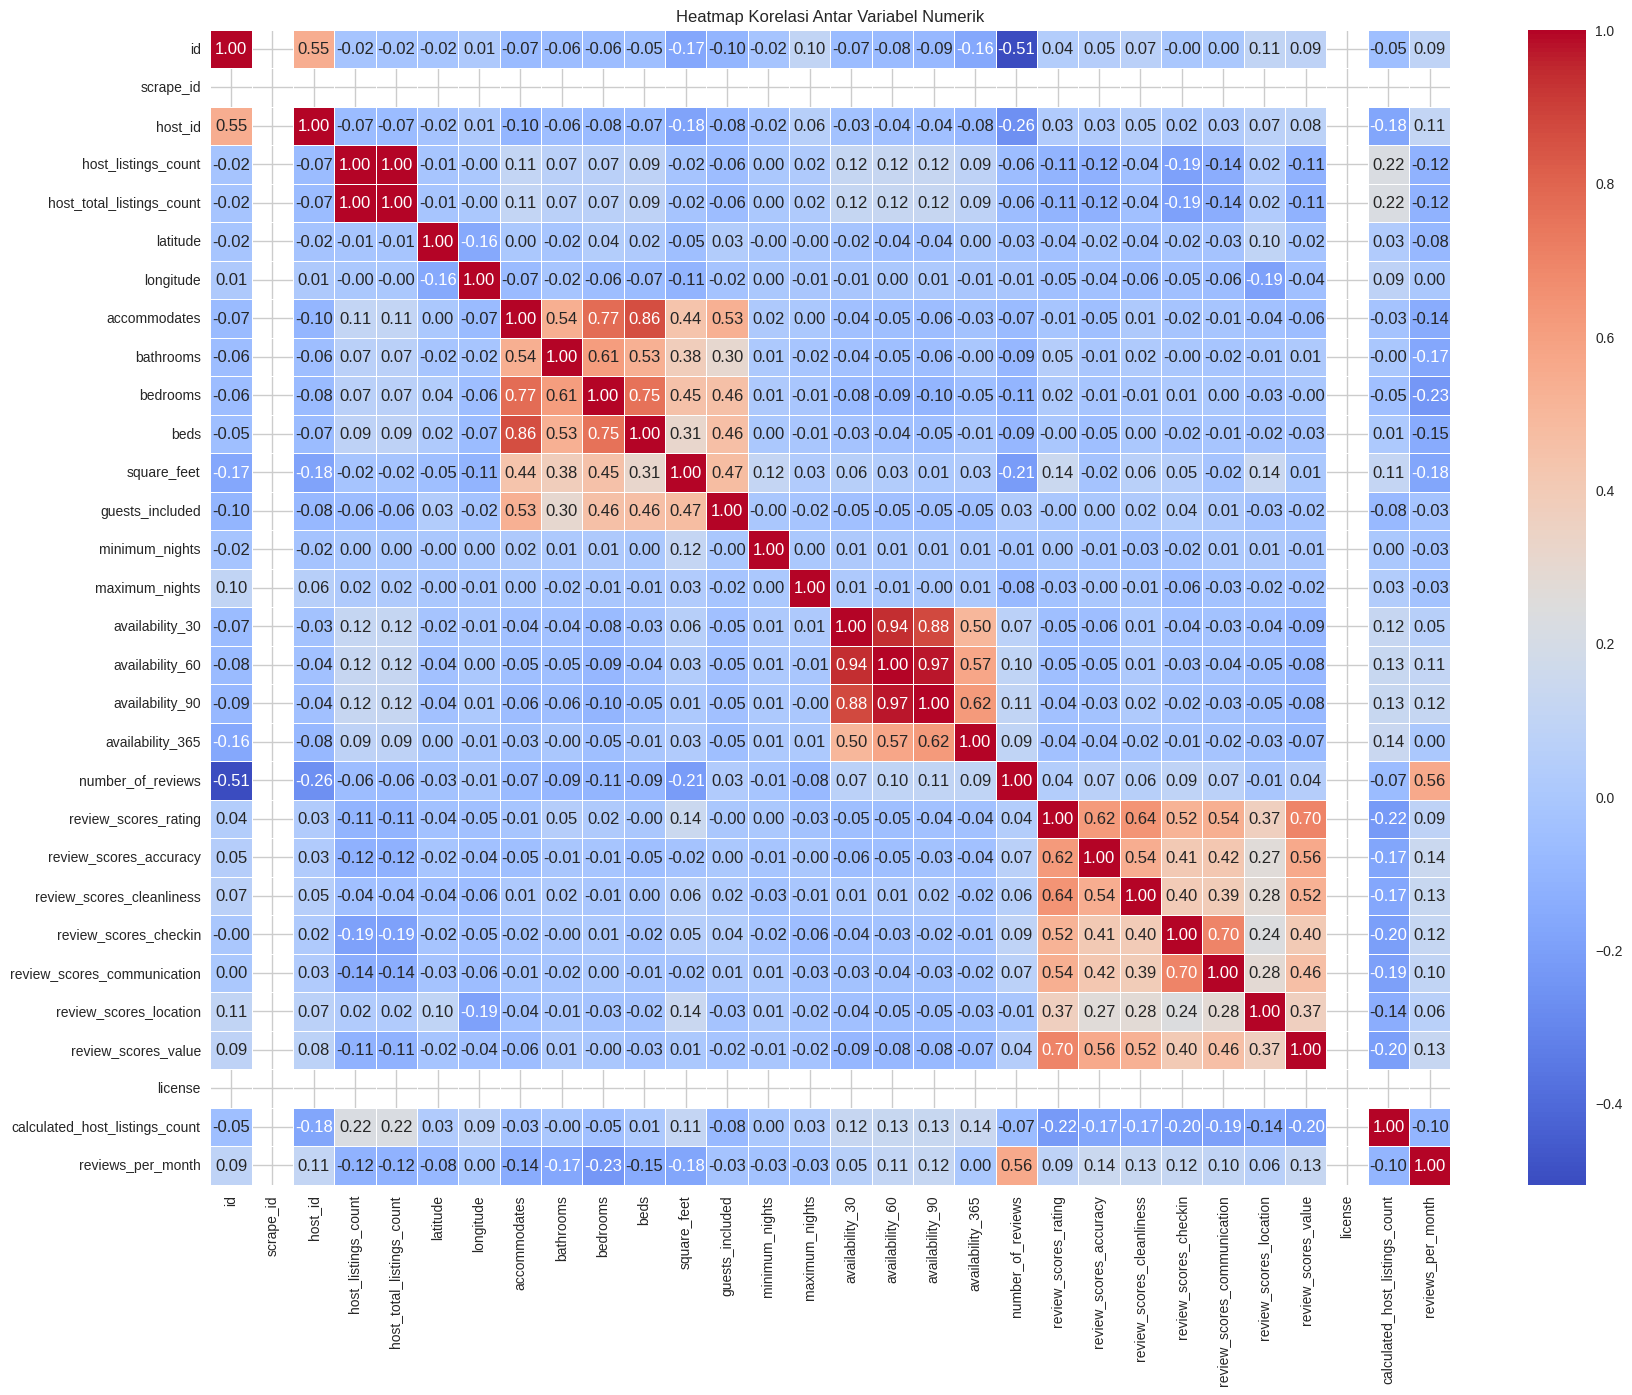

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik
numeric_data = d_listing.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Judul grafik
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [8]:
calendar_selected = d_calender[['listing_id', 'date', 'available', 'price']]
listings_selected = d_listing[['id', 'property_type', 'room_type', 'price', 'city', 'review_scores_rating', 'accommodates', 'bedrooms', 'beds', 'bed_type',
                               'latitude', 'longitude', 'host_is_superhost', 'neighbourhood_cleansed', 'bathrooms', 'availability_365', 'number_of_reviews',
                               'host_response_time', 'is_location_exact', 'instant_bookable', 'cancellation_policy', 'guests_included', 'host_total_listings_count', 'street',
                               'picture_url', 'name', 'listing_url']]

In [9]:
listings_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3818 non-null   int64  
 1   property_type              3817 non-null   object 
 2   room_type                  3818 non-null   object 
 3   price                      3818 non-null   object 
 4   city                       3818 non-null   object 
 5   review_scores_rating       3171 non-null   float64
 6   accommodates               3818 non-null   int64  
 7   bedrooms                   3812 non-null   float64
 8   beds                       3817 non-null   float64
 9   bed_type                   3818 non-null   object 
 10  latitude                   3818 non-null   float64
 11  longitude                  3818 non-null   float64
 12  host_is_superhost          3816 non-null   object 
 13  neighbourhood_cleansed     3818 non-null   objec

# EDA


In [10]:
# Membersihkan dan mengubah kolom price menjadi float
listings_selected['price'] = listings_selected['price'].replace('[\$,]', '', regex=True).astype(float)

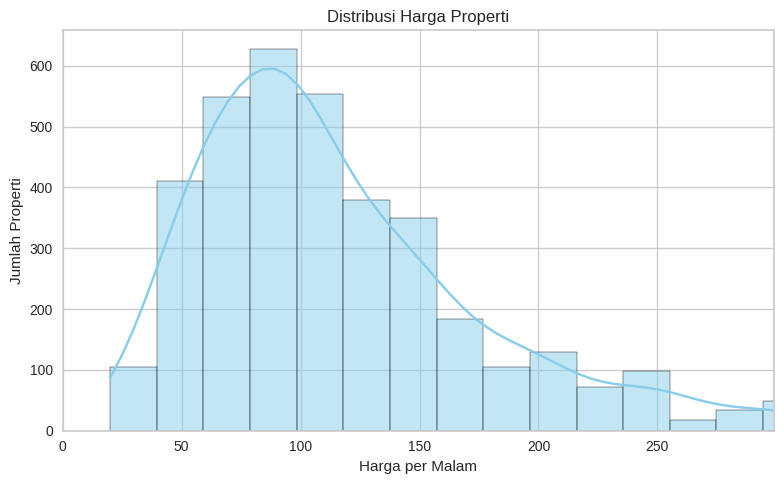

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=listings_selected, x='price', bins=50, kde=True, color='skyblue')
plt.title('Distribusi Harga Properti')
plt.xlabel('Harga per Malam')
plt.ylabel('Jumlah Properti')
plt.xlim(0, listings_selected['price'].quantile(0.95))  # fokus ke 95% data biar gak ketarik outlier
plt.tight_layout()
plt.show()

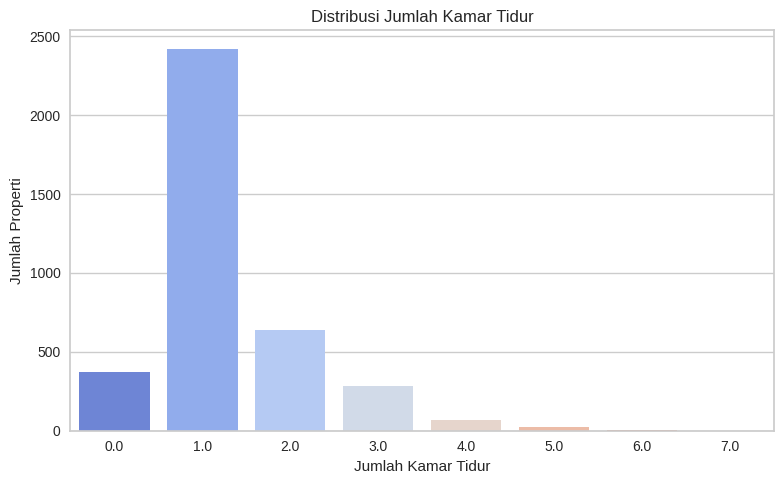

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=listings_selected, x='bedrooms', palette='coolwarm')
plt.title('Distribusi Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Jumlah Properti')
plt.tight_layout()
plt.show()

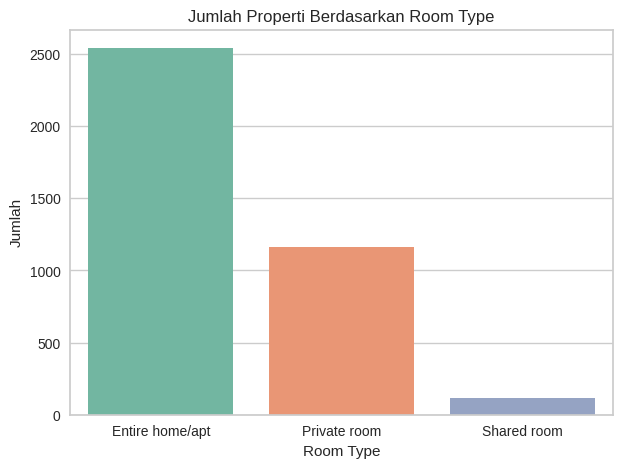

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(data=listings_selected, x='room_type', palette='Set2')
plt.title('Jumlah Properti Berdasarkan Room Type')
plt.xlabel('Room Type')
plt.ylabel('Jumlah')
plt.show()

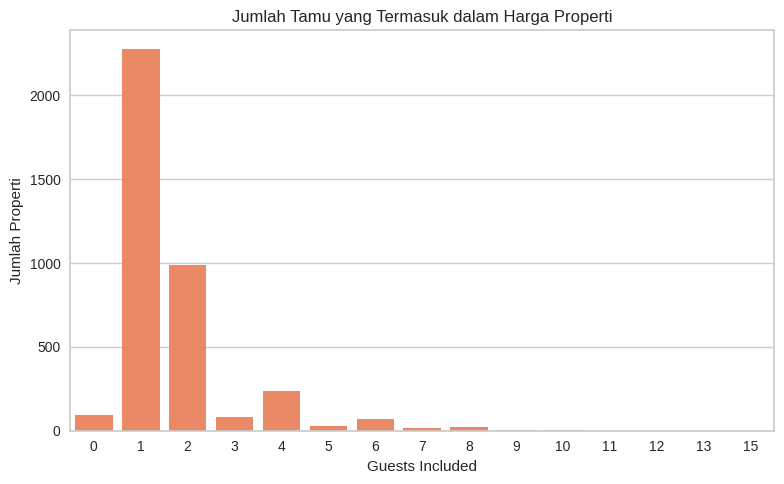

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=listings_selected, x='guests_included', color='coral')
plt.title('Jumlah Tamu yang Termasuk dalam Harga Properti')
plt.xlabel('Guests Included')
plt.ylabel('Jumlah Properti')
plt.tight_layout()
plt.show()

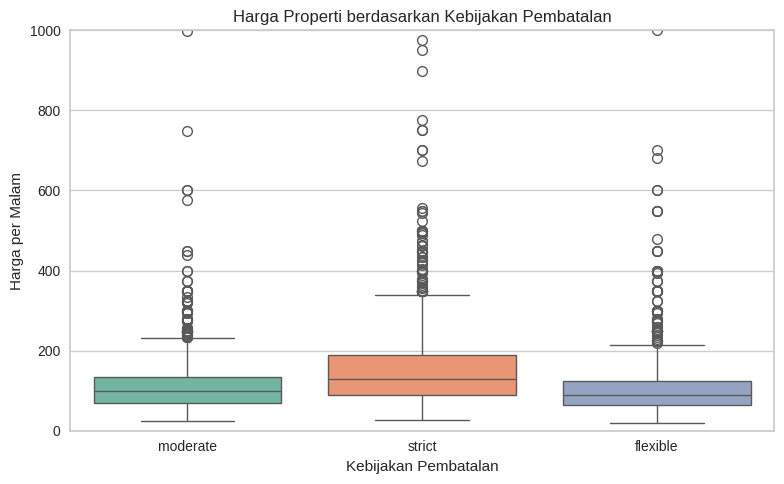

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=listings_selected,
    x='cancellation_policy',
    y='price',
    palette='Set2',
    showfliers=True  # tampilkan outlier
)
plt.ylim(0, listings_selected['price'].max())  # tampilkan sampai harga maksimum
plt.title('Harga Properti berdasarkan Kebijakan Pembatalan')
plt.xlabel('Kebijakan Pembatalan')
plt.ylabel('Harga per Malam')
plt.tight_layout()
plt.show()

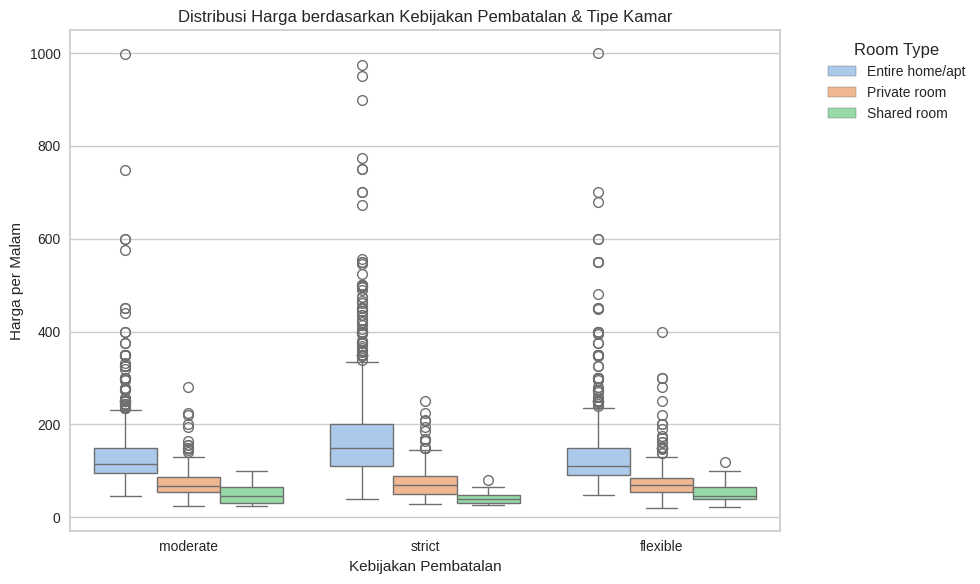

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=listings_selected,
    x='cancellation_policy',
    y='price',
    hue='room_type',
    palette='pastel',
    showfliers=True
)
plt.title('Distribusi Harga berdasarkan Kebijakan Pembatalan & Tipe Kamar')
plt.xlabel('Kebijakan Pembatalan')
plt.ylabel('Harga per Malam')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

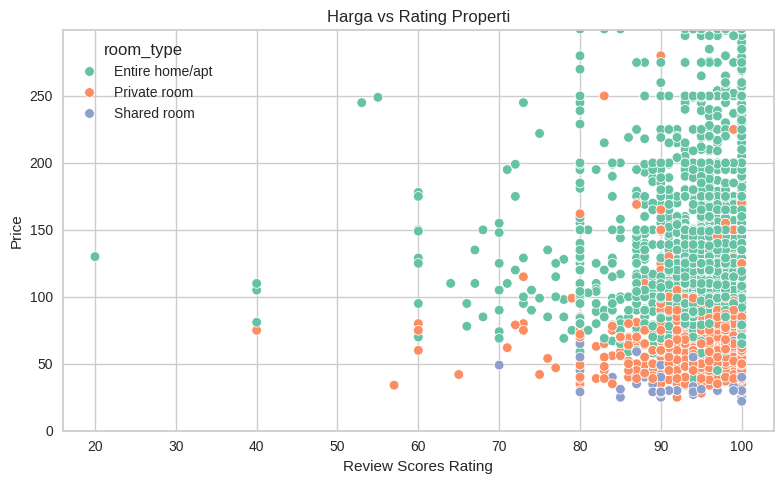

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=listings_selected, x='review_scores_rating', y='price', hue='room_type', palette='Set2')
plt.title('Harga vs Rating Properti')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.ylim(0, listings_selected['price'].quantile(0.95))  # biar lebih clean, limit outlier
plt.tight_layout()
plt.show()

# Handling Missing Value

In [18]:
listings_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3818 non-null   int64  
 1   property_type              3817 non-null   object 
 2   room_type                  3818 non-null   object 
 3   price                      3818 non-null   float64
 4   city                       3818 non-null   object 
 5   review_scores_rating       3171 non-null   float64
 6   accommodates               3818 non-null   int64  
 7   bedrooms                   3812 non-null   float64
 8   beds                       3817 non-null   float64
 9   bed_type                   3818 non-null   object 
 10  latitude                   3818 non-null   float64
 11  longitude                  3818 non-null   float64
 12  host_is_superhost          3816 non-null   object 
 13  neighbourhood_cleansed     3818 non-null   objec

In [19]:
# Misalnya df adalah dataframe kamu
missing_values = listings_selected.isnull().sum()
print("Missing values per kolom:")
missing_values.sort_values(ascending=False).head(20)

Missing values per kolom:


,0
review_scores_rating,647
host_response_time,523
bathrooms,16
bedrooms,6
host_is_superhost,2
host_total_listings_count,2
property_type,1
beds,1
id,0
room_type,0


In [20]:
calendar_selected['price'].fillna(0, inplace=True)
print(calendar_selected.isnull().sum())

listing_id    0
date          0
available     0
price         0
dtype: int64


In [21]:
listings_selected['review_scores_rating'].fillna(listings_selected['review_scores_rating'].median(), inplace=True)
listings_selected['host_is_superhost'].fillna(listings_selected['host_is_superhost'].mode()[0], inplace=True)
listings_selected['property_type'].fillna(listings_selected['property_type'].mode()[0], inplace=True)
listings_selected['bathrooms'].fillna(listings_selected['bathrooms'].median(), inplace=True)
listings_selected['bedrooms'].fillna(listings_selected['bedrooms'].median(), inplace=True)
listings_selected['beds'].fillna(listings_selected['beds'].median(), inplace=True)
listings_selected['host_response_time'].fillna(listings_selected['host_response_time'].mode()[0], inplace=True)
listings_selected['guests_included'].fillna(listings_selected['guests_included'].mode()[0], inplace=True)
listings_selected['host_total_listings_count'].fillna(listings_selected['host_total_listings_count'].median(), inplace=True)
listings_selected['cancellation_policy'].fillna(listings_selected['cancellation_policy'].mode()[0], inplace=True)

print(listings_selected.isnull().sum())

id                           0
property_type                0
room_type                    0
price                        0
city                         0
review_scores_rating         0
accommodates                 0
bedrooms                     0
beds                         0
bed_type                     0
latitude                     0
longitude                    0
host_is_superhost            0
neighbourhood_cleansed       0
bathrooms                    0
availability_365             0
number_of_reviews            0
host_response_time           0
is_location_exact            0
instant_bookable             0
cancellation_policy          0
guests_included              0
host_total_listings_count    0
street                       0
picture_url                  0
name                         0
listing_url                  0
dtype: int64


# Handling Inconsistency

In [22]:
listings_selected['price'] = listings_selected['price'].replace({'\$': '', ',': ''}, regex=True)
listings_selected['price'] = pd.to_numeric(listings_selected['price'], errors='coerce')
print(listings_selected['price'].head())

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64


In [23]:
for col in calendar_selected.select_dtypes(include=['object']).columns:
    calendar_selected[col] = calendar_selected[col].str.strip().str.title()

calendar_selected.head()

,listing_id,date,available,price
0,241032,2016-01-04,T,$85.00
1,241032,2016-01-05,T,$85.00
2,241032,2016-01-06,F,NaN
3,241032,2016-01-07,F,NaN
4,241032,2016-01-08,F,NaN


In [24]:
for col in listings_selected.select_dtypes(include=['object']).columns:
    listings_selected[col] = listings_selected[col].str.strip().str.title()

listings_selected.head

<bound method NDFrame.head of             id property_type        room_type  price     city  \
0       241032     Apartment  Entire Home/Apt   85.0  Seattle   
1       953595     Apartment  Entire Home/Apt  150.0  Seattle   
2      3308979         House  Entire Home/Apt  975.0  Seattle   
3      7421966     Apartment  Entire Home/Apt  100.0  Seattle   
4       278830         House  Entire Home/Apt  450.0  Seattle   
...        ...           ...              ...    ...      ...   
3813   8101950         House  Entire Home/Apt  359.0  Seattle   
3814   8902327     Apartment  Entire Home/Apt   79.0  Seattle   
3815  10267360         House  Entire Home/Apt   93.0  Seattle   
3816   9604740   Condominium  Entire Home/Apt   99.0  Seattle   
3817  10208623     Apartment  Entire Home/Apt   87.0  Seattle   

      review_scores_rating  accommodates  bedrooms  beds  bed_type  ...  \
0                     95.0             4       1.0   1.0  Real Bed  ...   
1                     96.0             4       1.0   1.0  Real Bed  ...   
2                     97.0            11       5.0   7.0  Real Bed  ...   
3                     96.0             3       0.0   2.0  Real Bed  ...   
4                     92.0             6       3.0   3.0  Real Bed  ...   
...                    ...           ...       ...   ...       ...  ...   
3813                  80.0             6       3.0   3.0  Real Bed  ...   
3814                 100.0             4       1.0   2.0  Real Bed  ...   
3815                  96.0             2       1.0   1.0  Real Bed  ...   
3816                  96.0             2       0.0   1.0  Real Bed  ...   
3817                  96.0             3       2.0   1.0  Real Bed  ...   

      host_response_time  is_location_exact instant_bookable  \
0     Within A Few Hours                  T                F   
1         Within An Hour                  T                F   
2     Within A Few Hours                  T                F   
3         Within An Hour                  T                F   
4         Within An Hour                  T                F   
...                  ...                ...              ...   
3813  Within A Few Hours                  T                F   
3814      Within An Hour                  T                F   
3815      Within An Hour                  F                F   
3816      Within An Hour                  F                F   
3817        Within A Day                  T                F   

     cancellation_policy  guests_included  host_total_listings_count  \
0               Moderate                2                        3.0   
1                 Strict                1                        6.0   
2                 Strict               10                        2.0   
3               Flexible                1                        1.0   
4                 Strict                6                        2.0   
...                  ...              ...                        ...   
3813              Strict                1                      354.0   
3814            Moderate                3                        1.0   
3815            Moderate                2                        1.0   
3816            Moderate                1                        1.0   
3817            Flexible                1                        1.0   

                                                 street  \
0         Gilman Dr W, Seattle, Wa 98119, United States   
1     7Th Avenue West, Seattle, Wa 98119, United States   
2     West Lee Street, Seattle, Wa 98119, United States   
3     8Th Avenue West, Seattle, Wa 98119, United States   
4          14Th Ave W, Seattle, Wa 98119, United States   
...                                                 ...   
3813  Northwest 48Th Street, Seattle, Wa 98107, Unit...   
3814  Fuhrman Avenue East, Seattle, Wa 98102, United...   
3815  South Laurel Street, Seattle, Wa 98178, United...   
3816  43Rd Avenue East, Seattle, Wa 98112, United St...   
3817 

# Feature Engginering

In [25]:
import numpy as np
import pandas as pd

# Membuat dictionary untuk menyesuaikan nama kota yang ada pada dataset
city_mapping = {
    'Seattle': 'Seattle',
    'Phinney Ridge Seattle': 'Seattle',
    'West Seattle': 'Seattle',
    'Ballard, Seattle': 'Seattle',
    '西雅图': 'Seattle',  # 'Xīyátú' untuk Seattle dalam Mandarin
    # Jika ada nama kota lain dalam bahasa atau format berbeda, bisa ditambahkan di sini
}

# Mengganti nama kota di kolom 'city' dengan nama kota yang konsisten
listings_selected['city_normalized'] = listings_selected['city'].map(city_mapping).fillna(listings_selected['city'])

# Memeriksa nilai unik pada kolom 'city' untuk memverifikasi semua nama kota yang perlu dipetakan
print("Unique cities in the original 'city' column:")
print(listings_selected['city'].unique())

# Memeriksa nilai-nilai yang terdeteksi sebagai 'NaN' pada 'city_normalized'
print("Cities with 'NaN' in 'city_normalized' after mapping:")
print(listings_selected[listings_selected['city_normalized'].isna()]['city'].unique())

# Koordinat pusat kota untuk beberapa kota (contoh: Seattle)
city_coordinates = {
    'Seattle': (47.6062, -122.3321),  # Koordinat pusat kota Seattle
    # Tambahkan koordinat untuk kota lain jika ada dalam dataset
}

# Menambah koordinat untuk kota yang belum ada di city_coordinates
city_coordinates.update({
    'New York': (40.7128, -74.0060),
    'Los Angeles': (34.0522, -118.2437),
    # Tambahkan kota lainnya jika diperlukan
})

# Fungsi untuk mendapatkan koordinat kota
def get_city_coordinates(city_name):
    return city_coordinates.get(city_name, (None, None))

# Menambahkan kolom untuk latitude dan longitude pusat kota
listings_selected['city_lat'], listings_selected['city_lon'] = zip(*listings_selected['city_normalized'].apply(get_city_coordinates))

# Menghitung jarak ke pusat kota yang sesuai berdasarkan koordinat kota dan properti
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius bumi dalam kilometer
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Jarak dalam kilometer

# Menghitung jarak ke pusat kota yang sesuai berdasarkan koordinat kota dan properti
listings_selected['distance_to_city'] = listings_selected.apply(
    lambda x: haversine(x['latitude'], x['longitude'], x['city_lat'], x['city_lon']) if x['city_lat'] and x['city_lon'] else None, axis=1
)

# Menampilkan hasil jarak ke pusat kota
print("Sample of the dataframe with calculated distance to city:")
#print(listings_selected[['listing_id', 'city_normalized', 'latitude', 'longitude', 'distance_to_city']].head())

Unique cities in the original 'city' column:
['Seattle' 'Ballard, Seattle' 'West Seattle' '西雅图' 'Phinney Ridge Seattle']
Cities with 'NaN' in 'city_normalized' after mapping:
[]
Sample of the dataframe with calculated distance to city:


# Clustering Listing Data

In [26]:
listings_selected_copy = listings_selected.copy()
listings_selected_copy.drop(['id','latitude','longitude','neighbourhood_cleansed', 'city_lat', 'city_lon', 'city_normalized'],axis=1, inplace=True)
listings_selected_copy

,property_type,room_type,price,city,review_scores_rating,accommodates,bedrooms,beds,bed_type,host_is_superhost,...,is_location_exact,instant_bookable,cancellation_policy,guests_included,host_total_listings_count,street,picture_url,name,listing_url,distance_to_city
0,Apartment,Entire Home/Apt,85.0,Seattle,95.0,4,1.0,1.0,Real Bed,F,...,T,F,Moderate,2,3.0,"Gilman Dr W, Seattle, Wa 98119, United States",Https://A1.Muscache.Com/Ac/Pictures/67560560/C...,Stylish Queen Anne Apartment,Https://Www.Airbnb.Com/Rooms/241032,4.439052
1,Apartment,Entire Home/Apt,150.0,Seattle,96.0,4,1.0,1.0,Real Bed,T,...,T,F,Strict,1,6.0,"7Th Avenue West, Seattle, Wa 98119, United States",Https://A0.Muscache.Com/Ac/Pictures/14409893/F...,Bright & Airy Queen Anne Apartment,Https://Www.Airbnb.Com/Rooms/953595,4.441933
2,House,Entire Home/Apt,975.0,Seattle,97.0,11,5.0,7.0,Real Bed,F,...,T,F,Strict,10,2.0,"West Lee Street, Seattle, Wa 98119, United States",Https://A2.Muscache.Com/Ac/Pictures/B4324E0F-A...,New Modern House-Amazing Water View,Https://Www.Airbnb.Com/Rooms/3308979,3.833194
3,Apartment,Entire Home/Apt,100.0,Seattle,96.0,3,0.0,2.0,Real Bed,F,...,T,F,Flexible,1,1.0,"8Th Avenue West, Seattle, Wa 98119, United States",Https://A0.Muscache.Com/Ac/Pictures/94146944/6...,Queen Anne Chateau,Https://Www.Airbnb.Com/Rooms/7421966,4.543407
4,House,Entire Home/Apt,450.0,Seattle,92.0,6,3.0,3.0,Real Bed,F,...,T,F,Strict,6,2.0,"14Th Ave W, Seattle, Wa 98119, United States",Https://A1.Muscache.Com/Ac/Pictures/6120468/B0...,Charming Craftsman 3 Bdm House,Https://Www.Airbnb.Com/Rooms/278830,4.240533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,House,Entire Home/Apt,359.0,Seattle,80.0,6,3.0,3.0,Real Bed,F,...,T,F,Strict,1,354.0,"Northwest 48Th Street, Seattle, Wa 98107, Unit...",Https://A2.Muscache.Com/Ac/Pictures/103217071/...,3Br Mountain View House In Seattle,Https://Www.Airbnb.Com/Rooms/8101950,6.770782
3814,Apartment,Entire Home/Apt,79.0,Seattle,100.0,4,1.0,2.0,Real Bed,F,...,T,F,Moderate,3,1.0,"Fuhrman Avenue East, Seattle, Wa 98102, United...",Https://A2.Muscache.Com/Ac/Pictures/626D4B1F-6...,Portage Bay View!-One Bedroom Apt,Https://Www.Airbnb.Com/Rooms/8902327,4.930030
3815,House,Entire Home/Apt,93.0,Seattle,96.0,2,1.0,1.0,Real Bed,F,...,F,F,Moderate,2,1.0,"South Laurel Street, Seattle, Wa 98178, United...",Https://A2.Muscache.Com/Ac/Pictures/A5974F04-2...,Private Apartment View Of Lake Wa,Https://Www.Airbnb.Com/Rooms/10267360,12.855801
3816,Condominium,Entire Home/Apt,99.0,Seattle,96.0,2,0.0,1.0,Real Bed,F,...,F,F,Moderate,1,1.0,"43Rd Avenue East, Seattle, Wa 98112, United St...",Https://A2.Muscache.Com/Ac/Pictures/202E4Ad6-B...,Amazing View With Modern Comfort!,Https://Www.Airbnb.Com/Rooms/9604740,5.140297


In [27]:
listings_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_type              3818 non-null   object 
 1   room_type                  3818 non-null   object 
 2   price                      3818 non-null   float64
 3   city                       3818 non-null   object 
 4   review_scores_rating       3818 non-null   float64
 5   accommodates               3818 non-null   int64  
 6   bedrooms                   3818 non-null   float64
 7   beds                       3818 non-null   float64
 8   bed_type                   3818 non-null   object 
 9   host_is_superhost          3818 non-null   object 
 10  bathrooms                  3818 non-null   float64
 11  availability_365           3818 non-null   int64  
 12  number_of_reviews          3818 non-null   int64  
 13  host_response_time         3818 non-null   objec

In [28]:
# Mapping untuk 'host_is_superhost'
superhost_mapping = {'T': 1, 'F': 0}
listings_selected_copy['host_is_superhost'] = listings_selected_copy['host_is_superhost'].map(superhost_mapping)

# Mapping untuk 'is_location_exact'
location_exact_mapping = {'T': 1, 'F': 0}
listings_selected_copy['is_location_exact'] = listings_selected_copy['is_location_exact'].map(location_exact_mapping)

# Mapping untuk 'instant_bookable'
instant_bookable_mapping = {'T': 1, 'F': 0}
listings_selected_copy['instant_bookable'] = listings_selected_copy['instant_bookable'].map(instant_bookable_mapping)


In [29]:
response_time_mapping = {
    'Within An Hour': 1,
    'Within A Few Hours': 2,
    'Within A Day': 3,
    'A Few Days Or More': 4
}
# Menghapus spasi ekstra di kedua sisi nilai dalam kolom 'host_response_time'
listings_selected_copy['host_response_time'] = listings_selected_copy['host_response_time'].str.strip()

# Kemudian lakukan pemetaan mapping)
listings_selected_copy['host_response_time_encoded'] = listings_selected_copy['host_response_time'].map(response_time_mapping)

In [30]:
# Menghitung statistik (mean, std, median) berdasarkan property_type dan price
property_stats = listings_selected_copy.groupby('property_type')['price'].agg(['mean', 'max', 'median'])
#property_stats = listings_selected_copy.groupby('property_type')['price_x'].agg(['mean', 'std', 'median'])

# Mengubah nama kolom untuk memperjelas arti statistik yang dihitung
property_stats.columns = ['mean_property_type', 'max_property_type', 'median_property_type']

# Menampilkan hasil statistik untuk property_type dengan nama kolom yang jelas
print(property_stats)

# Melakukan merge untuk menambahkan kolom mean, std, dan median ke listings_selected_copy
listings_selected_copy = listings_selected_copy.merge(property_stats, on='property_type', how='left')

                 mean_property_type  max_property_type  median_property_type
property_type                                                               
Apartment                122.932670              999.0                 110.0
Bed & Breakfast          112.054054              299.0                  99.0
Boat                     282.375000              775.0                 150.0
Bungalow                 115.615385              349.0                  95.0
Cabin                    104.666667              300.0                  95.0
Camper/Rv                120.461538              375.0                  82.0
Chalet                    98.500000              135.0                  98.5
Condominium              151.109890              700.0                 115.0
Dorm                      39.500000               41.0                  39.5
House                    132.344291             1000.0                  95.0
Loft                     135.700000              425.0                 102.5

In [31]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom 'cancellation_policy'
listings_selected_copy['cancellation_policy_encoded'] = label_encoder.fit_transform(listings_selected_copy['cancellation_policy']) + 1

# Menampilkan hasil encoding
print(listings_selected_copy[['cancellation_policy', 'cancellation_policy_encoded']].head())

  cancellation_policy  cancellation_policy_encoded
0            Moderate                            2
1              Strict                            3
2              Strict                            3
3            Flexible                            1
4              Strict                            3


In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
listings_selected_copy['room_type_encoded'] = label_encoder.fit_transform(listings_selected_copy['room_type']) + 1
label_mapping = {category: code + 1 for category, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
print(label_mapping)
print(listings_selected_copy[['room_type', 'room_type_encoded']].head())

{'Entire Home/Apt': np.int64(1), 'Private Room': np.int64(2), 'Shared Room': np.int64(3)}
         room_type  room_type_encoded
0  Entire Home/Apt                  1
1  Entire Home/Apt                  1
2  Entire Home/Apt                  1
3  Entire Home/Apt                  1
4  Entire Home/Apt                  1


In [33]:
listings_selected_copy.drop(['property_type', 'host_response_time','bed_type', 'cancellation_policy'],axis=1, inplace=True)

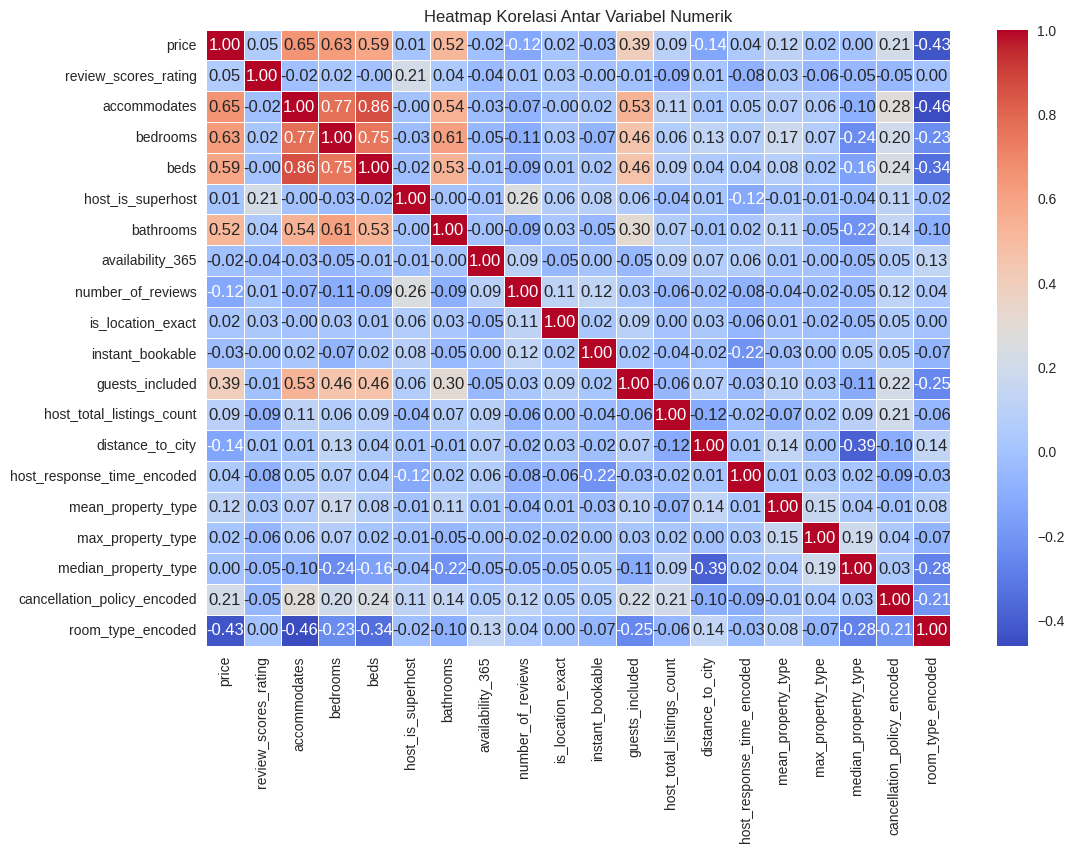

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik
numeric_data = listings_selected_copy.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Judul grafik
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [35]:
# Versi kedua: Menghapus semua kolom yang tidak diperlukan
columns_to_drop = ['is_location_exact', 'instant_bookable', 'host_response_time_encoded', 'availability_365']
listings_selected_copy = listings_selected_copy.drop(columns=columns_to_drop, axis=1)

In [36]:
listings_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    3818 non-null   object 
 1   price                        3818 non-null   float64
 2   city                         3818 non-null   object 
 3   review_scores_rating         3818 non-null   float64
 4   accommodates                 3818 non-null   int64  
 5   bedrooms                     3818 non-null   float64
 6   beds                         3818 non-null   float64
 7   host_is_superhost            3818 non-null   int64  
 8   bathrooms                    3818 non-null   float64
 9   number_of_reviews            3818 non-null   int64  
 10  guests_included              3818 non-null   int64  
 11  host_total_listings_count    3818 non-null   float64
 12  street                       3818 non-null   object 
 13  picture_url       

In [37]:
# Pilih hanya kolom yang diinginkan
selected_columns = ['price', 'accommodates', 'bedrooms', 'beds', 'guests_included', 'room_type_encoded',
                    'city', 'street', 'picture_url', 'name', 'listing_url', 'review_scores_rating', 'bathrooms', 'room_type']

# Buat DataFrame baru yang hanya berisi kolom yang dipilih
listings_selected_copy_streamlit = listings_selected_copy[selected_columns]

In [38]:
# Pilih hanya 6 variabel yang diinginkan
selected_columns = ['price', 'accommodates', 'bedrooms', 'beds', 'guests_included', 'room_type_encoded']

# Buat DataFrame baru yang hanya berisi 6 kolom yang dipilih
listings_selected_copy = listings_selected_copy[selected_columns]

# Menampilkan informasi dari DataFrame yang baru
listings_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              3818 non-null   float64
 1   accommodates       3818 non-null   int64  
 2   bedrooms           3818 non-null   float64
 3   beds               3818 non-null   float64
 4   guests_included    3818 non-null   int64  
 5   room_type_encoded  3818 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 179.1 KB


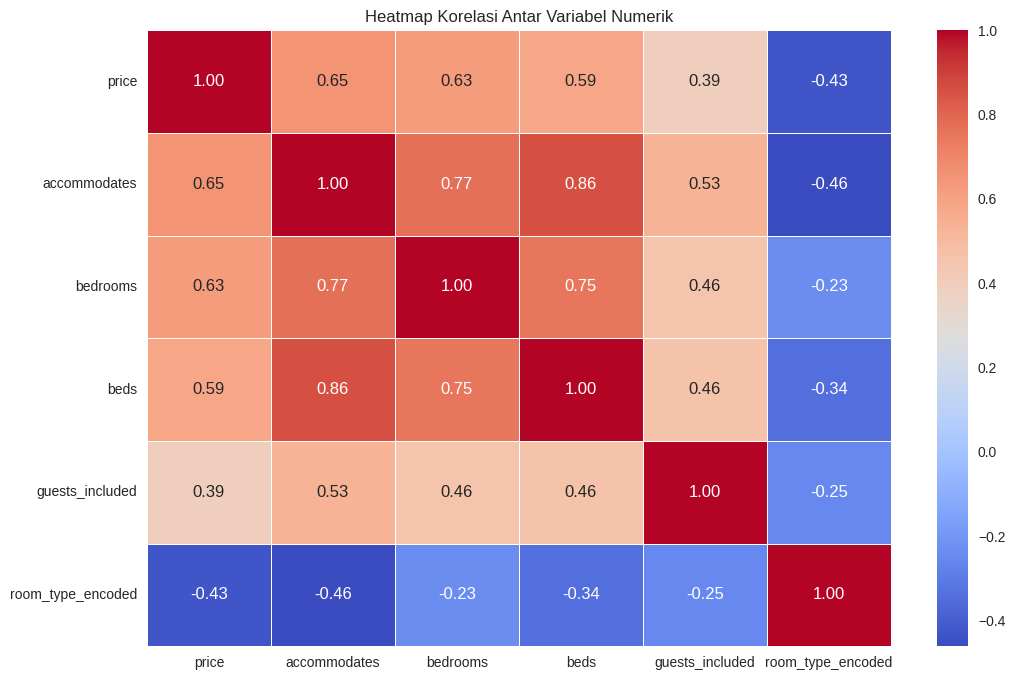

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik
numeric_data = listings_selected_copy.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Judul grafik
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Pilih semua kolom numerik secara otomatis
numeric_features = listings_selected_copy.select_dtypes(include=['number']).columns.tolist()

# Menyiapkan transformer untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Pipeline akhir
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['price', 'accommodates',
                                                   'bedrooms', 'beds',
                                                   'guests_included',
                                                   'room_type_encoded'])]))])

In [41]:
# Pipeline untuk preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit dan transform data
transformed_data = pipeline.fit_transform(listings_selected_copy)

# Ambil nama fitur baru setelah transformasi
feature_names = pipeline.named_steps['preprocessor'].named_transformers_['num'].get_feature_names_out(numeric_features)

# Konversi hasil menjadi DataFrame dan beri nama fitur
transformed_data = pd.DataFrame(transformed_data, columns=feature_names)

# Jika kolom tidak ada dalam 'numeric_feature', konversi tipe data ke integer
for col in transformed_data.columns:
    if col not in numeric_features:  # Pastikan kolom yang tidak ada di 'numeric_features' dikonversi
        transformed_data[col] = transformed_data[col].astype(int)

In [42]:
transformed_data

,price,accommodates,bedrooms,beds,guests_included,room_type_encoded
0,0.066327,0.200000,0.142857,0.000000,0.133333,0.0
1,0.132653,0.200000,0.142857,0.000000,0.066667,0.0
2,0.974490,0.666667,0.714286,0.428571,0.666667,0.0
3,0.081633,0.133333,0.000000,0.071429,0.066667,0.0
4,0.438776,0.333333,0.428571,0.142857,0.400000,0.0
...,...,...,...,...,...,...
3813,0.345918,0.333333,0.428571,0.142857,0.066667,0.0
3814,0.060204,0.200000,0.142857,0.071429,0.200000,0.0
3815,0.074490,0.066667,0.142857,0.000000,0.133333,0.0
3816,0.080612,0.066667,0.000000,0.000000,0.066667,0.0


In [43]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Inisialisasi PCA dengan 14 komponen
pca = PCA(n_components=6)

# Melakukan PCA pada data yang telah ditransformasi
pca_transformed = pca.fit_transform(transformed_data)

# Membuat DataFrame hasil PCA
pca_columns = [f'PCA_{i+1}' for i in range(6)]  # Sesuaikan jumlah kolom dengan n_components
pca_df = pd.DataFrame(pca_transformed, columns=pca_columns)

# Melihat proporsi variansi dari masing-masing PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Menghitung variansi kumulatif
cumulative_variance = np.cumsum(explained_variance_ratio)

# Menampilkan proporsi variansi tiap komponen beserta variansi kumulatif
variance_df = pd.DataFrame({
    'PCA Component': pca_columns,
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance
})

print(variance_df)

  PCA Component  Explained Variance Ratio  Cumulative Explained Variance
0         PCA_1                  0.659502                       0.659502
1         PCA_2                  0.233520                       0.893022
2         PCA_3                  0.040934                       0.933956
3         PCA_4                  0.030956                       0.964912
4         PCA_5                  0.025484                       0.990396
5         PCA_6                  0.009604                       1.000000


# Penentuan Cluster


In [44]:
# Menentukan jumlah komponen PCA yang akan digunakan (misalnya 5, bisa diganti sesuai kebutuhan)
n_components = 3  # Bisa diganti sesuai kebutuhan (6, 7, atau lainnya)

# Menggunakan jumlah komponen yang dipilih
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(transformed_data)  # transformed_data adalah data yang sudah distandarisasi sebelumnya

# Fungsi untuk mengevaluasi clustering
def evaluate_clustering(labels, data):
    db_index = davies_bouldin_score(data, labels)
    silhouette = silhouette_score(data, labels)
    return db_index, silhouette

In [45]:
pca_data

array([[-0.15243165, -0.10836331,  0.04283531],
       [-0.15699943, -0.1068689 , -0.03214792],
       [-0.71682495,  0.94208715,  0.18762382],
       ...,
       [-0.11288866, -0.17269752,  0.03697876],
       [-0.07670394, -0.26887422,  0.01606812],
       [-0.15365798, -0.07382059, -0.0643558 ]])

Visualizing the Elbow Method for Optimal Clusters:


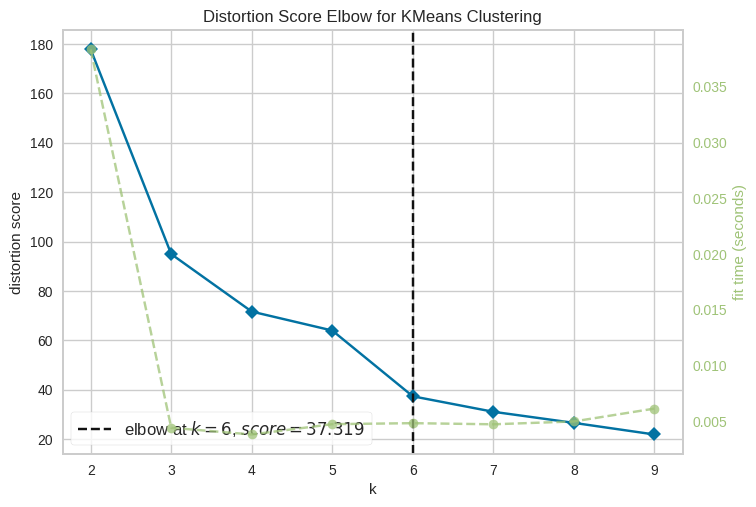

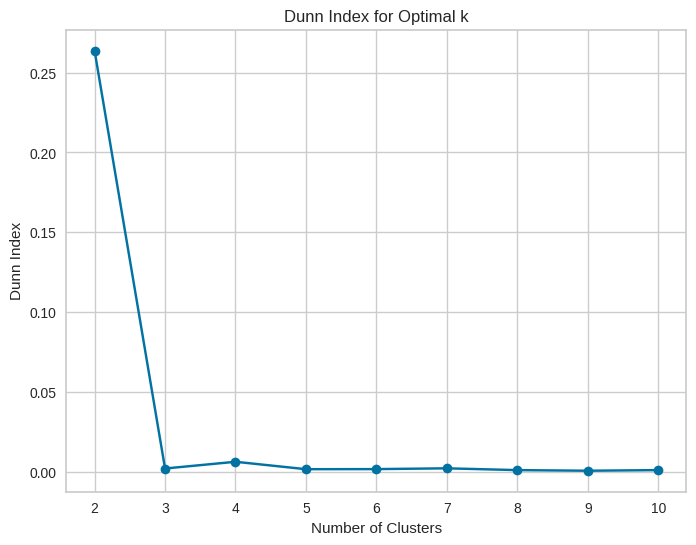

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from yellowbrick.cluster import KElbowVisualizer

# Elbow Method using KElbowVisualizer from Yellowbrick
def elbow_method_visualizer(data):
    cluster_model = KMeans(random_state=42)
    visualizer = KElbowVisualizer(cluster_model, k=(2, 10))  # K dari 2 sampai 10
    visualizer.fit(data)  # Gunakan data PCA yang sudah diproses
    visualizer.show()

# Dunn Index Calculation
def dunn_index(data, labels):
    # Compute pairwise distances between all points
    pairwise_dist = pairwise_distances(data)

    # Compute intra-cluster distances (maximum distance within each cluster)
    intra_cluster_distances = []
    for i in np.unique(labels):
        cluster_points = data[labels == i]
        if len(cluster_points) > 1:
            intra_cluster_distances.append(np.max(pairwise_dist[labels == i][:, labels == i]))
        else:
            intra_cluster_distances.append(0)

    # Compute inter-cluster distances (minimum distance between clusters)
    inter_cluster_distances = []
    for i in range(len(np.unique(labels))):
        for j in range(i + 1, len(np.unique(labels))):
            cluster_i = data[labels == i]
            cluster_j = data[labels == j]
            min_distance = np.min(pairwise_dist[labels == i][:, labels == j])
            inter_cluster_distances.append(min_distance)

    # Dunn Index is the minimum inter-cluster distance divided by the maximum intra-cluster distance
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Set parameters
n_components = 3  # Use PCA transformed data or original data
data = pca_data  # Replace with your transformed data

# 1. Elbow Method Visualization
print("Visualizing the Elbow Method for Optimal Clusters:")
elbow_method_visualizer(data)

# 2. Dunn Index Calculation
n_clusters_list = range(2, 11)  # K values from 2 to 10
dunn_scores = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    dunn_scores.append(dunn_index(data, labels))

# Plot Dunn Index to see which k gives the best value
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_list, dunn_scores, marker='o')
plt.title('Dunn Index for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index')
plt.show()

Berdasarkan grafik ini, jumlah klaster optimal untuk dataset ini adalah 5, karena setelah titik ini, penurunan distorsi skor semakin kecil dan tidak memberikan perbaikan yang signifikan.

In [47]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=8b72c70952a41f7913b4a5f86e0da66490a0c191e961f943f3c69ea5d36111ec
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


# Menentukan Model terbaik dari 4 jenis Clustering

In [48]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from minisom import MiniSom  # Self Organizing Map (SOM)

# K-Means Clustering
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_model.fit_predict(pca_data)
kmeans_db_index, kmeans_silhouette = evaluate_clustering(kmeans_labels, pca_data)

# Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo_model.fit_predict(pca_data)
agglo_db_index, agglo_silhouette = evaluate_clustering(agglo_labels, pca_data)

# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(pca_data)
dbscan_db_index, dbscan_silhouette = evaluate_clustering(dbscan_labels, pca_data)

import numpy as np
from minisom import MiniSom

# Inisialisasi Self Organizing Map (SOM) dengan ukuran grid 10x10
som = MiniSom(x=10, y=10, input_len=pca_data.shape[1], sigma=1.0, learning_rate=0.5)
som.train(pca_data, 1000)  # Training SOM dengan 1000 iterasi

# Mendapatkan koordinat pemenang node untuk setiap data
som_labels = np.array([som.winner(x) for x in pca_data])

# Menggabungkan koordinat x dan y dari node pemenang untuk mendapatkan ID unik untuk setiap node
som_labels_flat = np.array([som.winner(x)[0] * 10 + som.winner(x)[1] for x in pca_data])

# Pembagian cluster berdasarkan ID node menggunakan np.digitize
num_clusters = 3
bins = np.linspace(0, max(som_labels_flat), num_clusters + 1)  # Menentukan bins sesuai dengan jumlah cluster
cluster_ids = np.digitize(som_labels_flat, bins) - 1  # 0-based indexing, untuk memastikan indeks dimulai dari 0

# Menampilkan hasil label cluster
print(f"SOM Cluster IDs: {cluster_ids}")

SOM Cluster IDs: [2 2 0 ... 2 2 1]


# Evaluasi Model

In [49]:
from sklearn.metrics import calinski_harabasz_score

# Menghitung Calinski-Harabasz Index (CHI) untuk setiap model clustering
kmeans_chi = calinski_harabasz_score(pca_data, kmeans_labels)
agglo_chi = calinski_harabasz_score(pca_data, agglo_labels)
dbscan_chi = calinski_harabasz_score(pca_data, dbscan_labels)

# Evaluating the Clustering
som_db_index = davies_bouldin_score(pca_data, cluster_ids)
som_silhouette = silhouette_score(pca_data, cluster_ids)
som_chi = calinski_harabasz_score(pca_data, cluster_ids)

# Output hasil evaluasi
print(f"KMeans - Davies-Bouldin Index: {kmeans_db_index}, Silhouette Score: {kmeans_silhouette}, Calinski-Harabasz Index: {kmeans_chi}")
print(f"Agglomerative Clustering - Davies-Bouldin Index: {agglo_db_index}, Silhouette Score: {agglo_silhouette}, Calinski-Harabasz Index: {agglo_chi}")
print(f"DBSCAN - Davies-Bouldin Index: {dbscan_db_index}, Silhouette Score: {dbscan_silhouette}, Calinski-Harabasz Index: {dbscan_chi}")
print(f"SOM - Davies-Bouldin Index: {som_db_index}, Silhouette Score: {som_silhouette}, Calinski-Harabasz Index: {som_chi}")

KMeans - Davies-Bouldin Index: 0.8186874207757582, Silhouette Score: 0.5795543317822373, Calinski-Harabasz Index: 5918.178776816101
Agglomerative Clustering - Davies-Bouldin Index: 0.5769524294805577, Silhouette Score: 0.6467963082350365, Calinski-Harabasz Index: 8509.915732410222
DBSCAN - Davies-Bouldin Index: 0.32520717132270954, Silhouette Score: 0.6642697071317336, Calinski-Harabasz Index: 2627.0012671600116
SOM - Davies-Bouldin Index: 2.5711682377554377, Silhouette Score: 0.12480029271706806, Calinski-Harabasz Index: 718.5698420148342


Secara keseluruhan, KMeans adalah algoritma klasterisasi yang paling efektif berdasarkan hasil evaluasi, dengan nilai tinggi pada Calinski-Harabasz Index dan Silhouette Score. Agglomerative Clustering juga memberikan hasil yang cukup baik, namun sedikit lebih rendah dibandingkan KMeans. DBSCAN menunjukkan pemisahan yang baik dalam hal Davies-Bouldin Index, namun tidak cukup baik dalam Silhouette Score dan Calinski-Harabasz Index, sementara SOM memberikan hasil yang paling buruk di antara semua algoritma yang diuji. Selanjutnya akan dilakukan Hyperparameter Tunning untuk DBSCAN

KMeans secara keseluruhan menghasilkan klaster yang lebih terpisah dan lebih padat, seperti yang terlihat dari nilai Davies-Bouldin Index, Silhouette Score, dan Calinski-Harabasz Index yang lebih baik dibandingkan dengan DBSCAN. Jadi Motode terbaik adalah motode K-Means dengan 5 Cluster

# Visualisasi PCA

In [50]:
# Menentukan jumlah klaster secara manual (misalnya 4 klaster)
n_clusters = 6  # Tentukan jumlah klaster yang diinginkan

# Inisialisasi KMeans dengan jumlah klaster yang telah ditentukan
model = KMeans(n_clusters=n_clusters, random_state=42)

# Fit dan prediksi labels menggunakan KMeans
labels = model.fit_predict(pca_data)  # Gunakan data hasil PCA sebagai input

# Mengubah label dari 0-based menjadi 1-based
labels = labels + 1

# Menampilkan labels yang diperoleh
print(f'Labels: {labels}')

Labels: [1 1 3 ... 1 1 1]


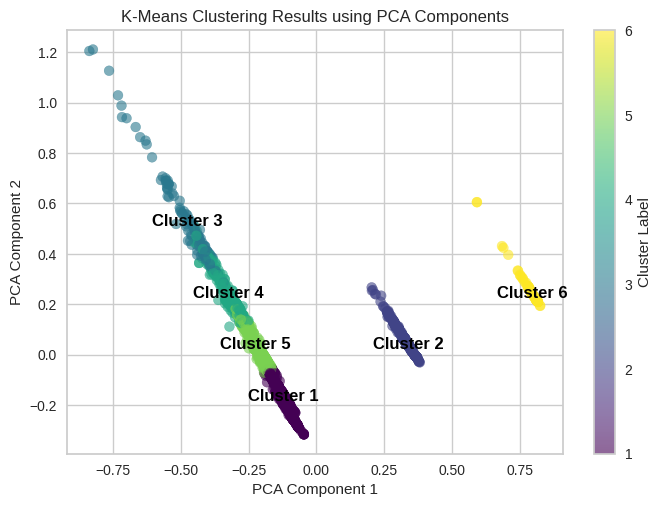

In [51]:
# Menampilkan plot hasil clustering menggunakan PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)

# Menghitung titik pusat (centroid) dari masing-masing cluster
centroids = np.array([pca_data[labels == i].mean(axis=0) for i in range(1, n_clusters+1)])

# Menambahkan teks "Cluster X" pada centroid setiap cluster
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu
plt.title('K-Means Clustering Results using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Menambahkan color bar untuk menunjukkan label cluster
plt.colorbar(label='Cluster Label')

# Menampilkan plot
plt.show()

Visualisasi ini menunjukkan hasil klasterisasi yang cukup baik, dengan pemisahan yang jelas antara sebagian besar klaster. Hal ini menandakan bahwa algoritma klasterisasi KMeans berhasil dalam mengidentifikasi struktur yang mendalam dalam data.
Tumpang tindih antar beberapa klaster (seperti Cluster 2 dan Cluster 3) mungkin menunjukkan bahwa beberapa data memiliki karakteristik yang mirip.

Agglomerative Clustering Labels: [3 3 1 ... 3 3 3]


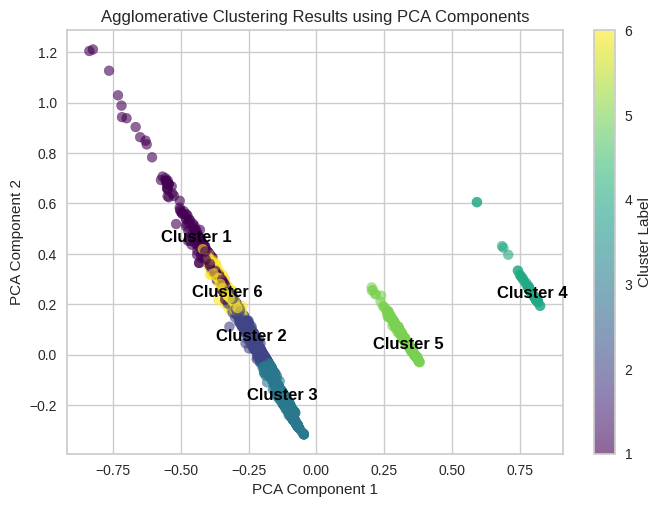

In [52]:
# Menentukan jumlah klaster untuk Agglomerative Clustering (misalnya 5 klaster)
agglo_n_clusters = 6

# Inisialisasi Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=agglo_n_clusters)

# Fit dan prediksi labels menggunakan Agglomerative Clustering
agglo_labels = agglo_model.fit_predict(pca_data)

# Mengubah label dari 0-based menjadi 1-based
agglo_labels = agglo_labels + 1

# Menampilkan labels yang diperoleh
print(f'Agglomerative Clustering Labels: {agglo_labels}')

# Menampilkan plot hasil clustering menggunakan PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agglo_labels, cmap='viridis', s=50, alpha=0.6)

# Menghitung titik pusat (centroid) dari masing-masing cluster
agglo_centroids = np.array([pca_data[agglo_labels == i].mean(axis=0) for i in range(1, agglo_n_clusters+1)])

# Menambahkan teks "Cluster X" pada centroid setiap cluster
for i, centroid in enumerate(agglo_centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu
plt.title('Agglomerative Clustering Results using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Menambahkan color bar untuk menunjukkan label cluster
plt.colorbar(label='Cluster Label')

# Menampilkan plot
plt.show()

DBSCAN Labels: [0 0 0 ... 0 0 0]


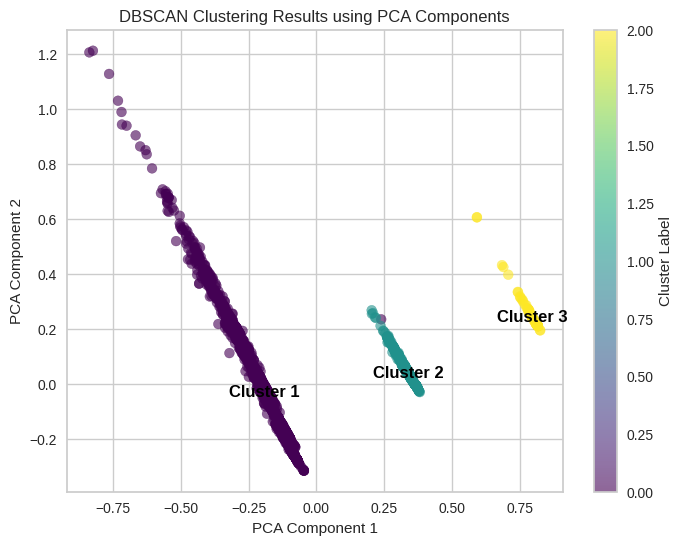

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Fungsi untuk mengevaluasi klasterisasi
def evaluate_clustering(labels, data):
    davies_bouldin = davies_bouldin_score(data, labels)
    silhouette = silhouette_score(data, labels)
    return davies_bouldin, silhouette

# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(pca_data)

# Menghitung evaluasi klasterisasi
dbscan_db_index, dbscan_silhouette = evaluate_clustering(dbscan_labels, pca_data)

# Mengubah label -1 (noise) menjadi nilai yang lebih mudah dibaca (misalnya 0)
dbscan_labels[dbscan_labels == -1] = 0

# Menampilkan labels yang diperoleh
print(f'DBSCAN Labels: {dbscan_labels}')

# Menampilkan plot hasil clustering menggunakan PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.6)

# Menghitung titik pusat (centroid) dari masing-masing cluster
centroids = np.array([pca_data[dbscan_labels == i].mean(axis=0) for i in np.unique(dbscan_labels)])

# Menambahkan teks "Cluster X" pada centroid setiap cluster
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu
plt.title('DBSCAN Clustering Results using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Menambahkan color bar untuk menunjukkan label cluster
plt.colorbar(label='Cluster Label')

# Menampilkan plot
plt.show()

KMeans Cluster Labels: [1 0 1 ... 0 1 1]


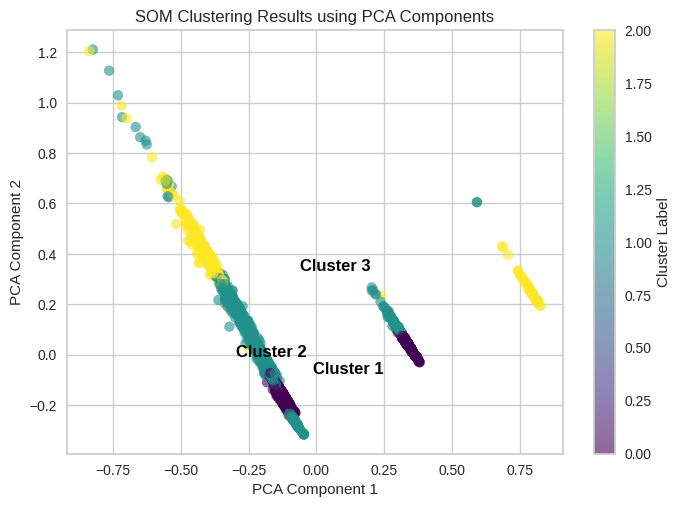

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Inisialisasi Self Organizing Map (SOM) dengan ukuran grid 10x10
som = MiniSom(x=10, y=10, input_len=pca_data.shape[1], sigma=1.0, learning_rate=0.5)

# Latih SOM dengan data PCA
som.train(pca_data, 1000)  # Training SOM dengan 1000 iterasi

# Menentukan label berdasarkan node pemenang SOM
som_labels = np.array([som.winner(x) for x in pca_data])  # Mendapatkan koordinat pemenang node
som_labels_flat = np.array([som.winner(x)[0] * 10 + som.winner(x)[1] for x in pca_data])  # Flatten grid menjadi label 1D

# Menggunakan KMeans untuk membagi hasil grid SOM ke dalam jumlah cluster yang diinginkan
num_clusters = 3  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(som_labels_flat.reshape(-1, 1))

# Menampilkan hasil label
print(f"KMeans Cluster Labels: {kmeans_labels}")

# Visualisasi hasil clustering menggunakan PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)

# Menghitung titik pusat (centroid) dari setiap cluster
centroids = np.array([pca_data[kmeans_labels == i].mean(axis=0) for i in range(num_clusters)])

# Menambahkan teks "Cluster X" pada centroid setiap cluster
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu
plt.title('SOM Clustering Results using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Menambahkan color bar untuk menunjukkan label cluster
plt.colorbar(label='Cluster Label')

# Menampilkan plot
plt.show()

KMeans Cluster Labels: [2 2 2 ... 0 0 2]


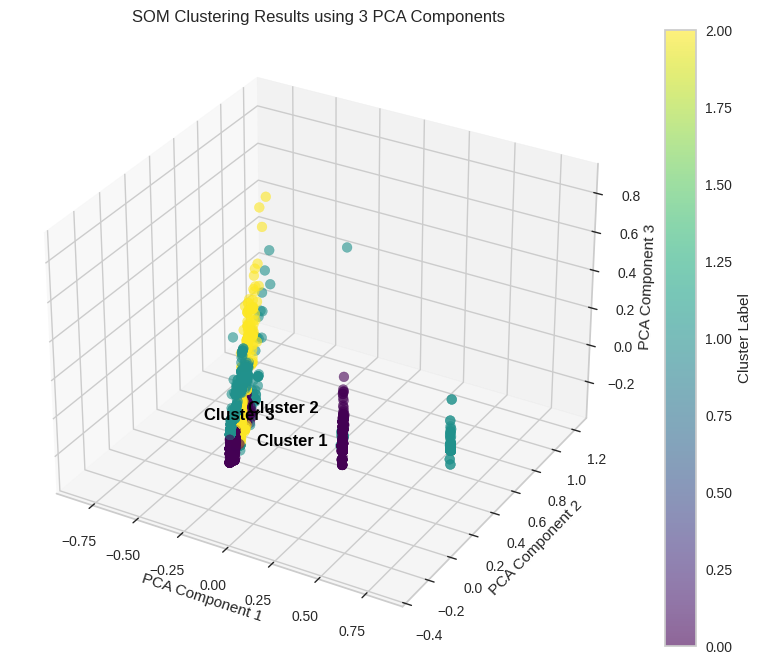

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # Import untuk plot 3D

# Inisialisasi Self Organizing Map (SOM) dengan ukuran grid 10x10
som = MiniSom(x=10, y=10, input_len=pca_data.shape[1], sigma=1.0, learning_rate=0.5)

# Latih SOM dengan data PCA
som.train(pca_data, 1000)  # Training SOM dengan 1000 iterasi

# Menentukan label berdasarkan node pemenang SOM
som_labels = np.array([som.winner(x) for x in pca_data])  # Mendapatkan koordinat pemenang node
som_labels_flat = np.array([som.winner(x)[0] * 10 + som.winner(x)[1] for x in pca_data])  # Flatten grid menjadi label 1D

# Menggunakan KMeans untuk membagi hasil grid SOM ke dalam jumlah cluster yang diinginkan
num_clusters = 3  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(som_labels_flat.reshape(-1, 1))

# Menampilkan hasil label
print(f"KMeans Cluster Labels: {kmeans_labels}")

# Melakukan PCA untuk mendapatkan 3 komponen utama
pca = PCA(n_components=3)
pca_data_3d = pca.fit_transform(pca_data)

# Visualisasi hasil clustering menggunakan 3 komponen PCA dalam plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
sc = ax.scatter(pca_data_3d[:, 0], pca_data_3d[:, 1], pca_data_3d[:, 2], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)

# Menghitung titik pusat (centroid) dari setiap cluster dalam 3D
centroids = np.array([pca_data_3d[kmeans_labels == i].mean(axis=0) for i in range(num_clusters)])

# Menambahkan teks "Cluster X" pada centroid setiap cluster
for i, centroid in enumerate(centroids):
    ax.text(centroid[0], centroid[1], centroid[2], f'Cluster {i+1}', fontsize=12, ha='center', va='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu
ax.set_title('SOM Clustering Results using 3 PCA Components')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Menambahkan color bar untuk menunjukkan label cluster
cbar = plt.colorbar(sc)
cbar.set_label('Cluster Label')

# Menampilkan plot 3D
plt.show()